In [216]:
# Manipulación de datos
import pandas as pd
# Operaciones numéricas
import numpy as np
# Para medición del tiempo que toma ejecutar los procesos
from time import time
# Para separar datos de entrenamiento y prueba
from sklearn.model_selection import train_test_split
# Librería para SVM
from sklearn.svm import SVC
# Medición de precisión
from sklearn.metrics import accuracy_score, confusion_matrix
# Generar gráficos
import matplotlib.pyplot as plt

In [218]:
#leemos los datos y los cargamos a la variable que sera nuesto df
fraude_df = pd.read_csv('creditcard.csv')

# la informacion que contiene
fraude_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [220]:
fraude_df.head() # Muestra 5 filas 

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### fraude = 1
### no fraude =0


In [222]:
# Contamos la cantidad de transacciones fraudulentas (1) y no fraudulentas (0)
fraude_df['Class'].value_counts()


Class
0    284315
1       492
Name: count, dtype: int64

para empezar el proceso de entrenamiento, es necesario separar las características (X) de las etiquetas (y).

In [224]:
# Seleccionamos las columnas que usaremos como características para el modelo
list_caract=[
    'Time', 'V1', 'V2', 'V3', 'V4', 'V5',
    'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 
    'V12', 'V13', 'V14', 'V15', 'V16', 'V17',
    'V18', 'V19', 'V20', 'V21', 'V22', 'V23',
    'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'
]

# Creamos el conjunto de características X y la variable objetivo y

x = fraude_df[list_caract] # X contiene solo las características seleccionadas
y = fraude_df['Class']  # y es la variable objetivo (0 = No Fraude, 1 = Fraude)


# Dividimos el conjunto de datos en entrenamiento (75%) y prueba (25%)
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25, random_state=42, stratify=y)

# Verificar la distribución de clases en el conjunto de entrenamiento
print("Distribución en entrenamiento:")
print(y_train.value_counts()) # Muestra cuántas transacciones son fraude y no fraude

print("\nDistribución en prueba:")
print(y_test.value_counts()) # Muestra la distribución en el conjunto de prueba


Distribución en entrenamiento:
Class
0    213236
1       369
Name: count, dtype: int64

Distribución en prueba:
Class
0    71079
1      123
Name: count, dtype: int64


## aplicamos submuestreo 

In [226]:
from imblearn.under_sampling import RandomUnderSampler

# Aplicamos submuestreo (undersampling) solo al conjunto de entrenamiento
# sampling_strategy=1.0 indica que igualamos la cantidad de clases (misma cantidad de fraudes y no fraudes)
undersampler = RandomUnderSampler(sampling_strategy=1.0, random_state=42)  # 1.0 iguala las clases
x_train_res, y_train_res = undersampler.fit_resample(x_train, y_train)

# Verificamos la nueva distribución de clases después del submuestreo
print("\nDistribución después del Submuestreo:")
print(y_train_res.value_counts())

# Mostramos el DataFrame resultante
y_train_res


Distribución después del Submuestreo:
Class
0    369
1    369
Name: count, dtype: int64


238804    0
242848    0
205037    0
204072    0
70934     0
         ..
11841     1
92777     1
4920      1
239499    1
42674     1
Name: Class, Length: 738, dtype: int64

In [228]:
dfres_y = pd.DataFrame(y_train_res, columns=['Class'])
dfsres_X = pd.DataFrame(x_train_res, columns=x_train.columns)

# visualizamos los datos 

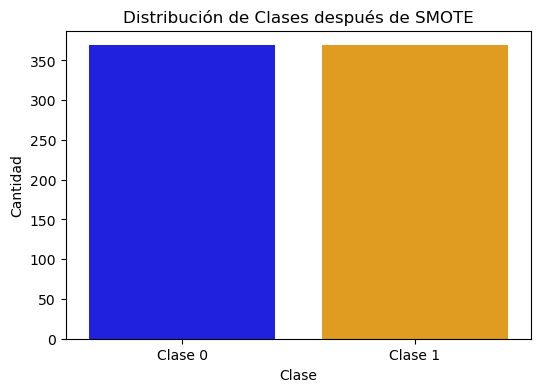

In [230]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Convertimos y_train_res en DataFrame asegurando que la columna se llame 'Class'
dfclass = pd.DataFrame(y_train_res, columns=['Class'])  

# Configurar el gráfico
plt.figure(figsize=(6, 4))
sns.countplot(x="Class", data=dfclass, hue="Class", palette=['blue', 'orange'], legend=False)

# Etiquetas y título
plt.xlabel("Clase")
plt.ylabel("Cantidad")
plt.title("Distribución de Clases después de SMOTE")

# Etiquetas del eje X
plt.xticks([0, 1], labels=['Clase 0', 'Clase 1'])

# Mostrar el gráfico
plt.show()


In [232]:
dfres_y.head()

,Class
238804,0
242848,0
205037,0
204072,0
70934,0


## Creación de la SVM

### kernel **lineal**

In [234]:
# Definició del modelo que llamaremos mod
mod = SVC(kernel='linear')

In [236]:
# Guardamos el tiempo de inicio del entrenamiento
hora_inicio = time()

# Iniciamos el entrenamiento ejecutando el metodo fit
# Los valores que enviamos son los valores de X y y
#
# .values convierte el DataFrame en un array de NumPy, que algunos modelos requieren
# .ravel() aplana y_train_res para que sea un vector unidimensional (requerido por scikit-learn)
mod.fit(dfsres_X.values, dfres_y.values.ravel())

# Imprimimos el tiempo tomado para el entrenamiento
print("Entrenamiento terminado en {} segundos".format(time() - hora_inicio))

Entrenamiento terminado en 78.33909559249878 segundos


In [238]:
# Guardamos el tiempo de inicio antes de hacer la predicción
hora_inicio = time()
# Generamos predicciones en el conjunto de prueba
y_pred = mod.predict(x_test)
# Mostramos el tiempo tomado para la predicción
print("Predicción terminada en {} segundos".format(time() - hora_inicio))

D:\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


Predicción terminada en 0.3130180835723877 segundos


In [240]:
# Calculamos la precisión del modelo comparando valores reales vs predichos
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)
# Mostramos el resultado con formato más claro
print("Precisión del modelo: {:.2f}%".format(accuracy * 100))

0.9872615937754557
Precisión del modelo: 98.73%


### Matriz de confusión (lineal)

In [242]:
# La función confusion_matrix recibe las "respuestas correctas" y nuestras predicciones
# genera una matriz que indica, para cada clase, la cantidad de predicciones correctas e incorrectas
conf_fraude = confusion_matrix(y_test, y_pred)
conf_fraude

array([[70194,   885],
       [   22,   101]], dtype=int64)

In [244]:

def plot_cm(cm, classes):
    """Genera un gráfico con la matriz de confusión y etiquetas descriptivas.

    Parámetros:
    cm : array (Matriz de confusión)
    classes : list (Lista con las clases del modelo)
    """
    plt.figure(figsize=(7, 7))
    plt.imshow(cm, cmap=plt.cm.Blues)
    plt.title('Matriz de Confusión')
    plt.colorbar()
    
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    # Definir etiquetas para cada celda de la matriz de confusión
    etiquetas = np.array([["Verdaderos negativos", "Falsos Positivos"], ["Falsos Negativos", "Verdaderos Positivos"]])  # Verdaderos/Falsos positivos y negativos
    thresh = cm.max() / 2.0  # Umbral para cambiar el color del texto

    # Dibujar los valores dentro de la matriz con etiquetas
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, f"{cm[i, j]:d}\n({etiquetas[i, j]})",
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black",
                     fontsize=12)

    plt.ylabel("Valores Reales")
    plt.xlabel("Valores Predichos")
    plt.grid(False)  # Evitar líneas innecesarias
    plt.show()



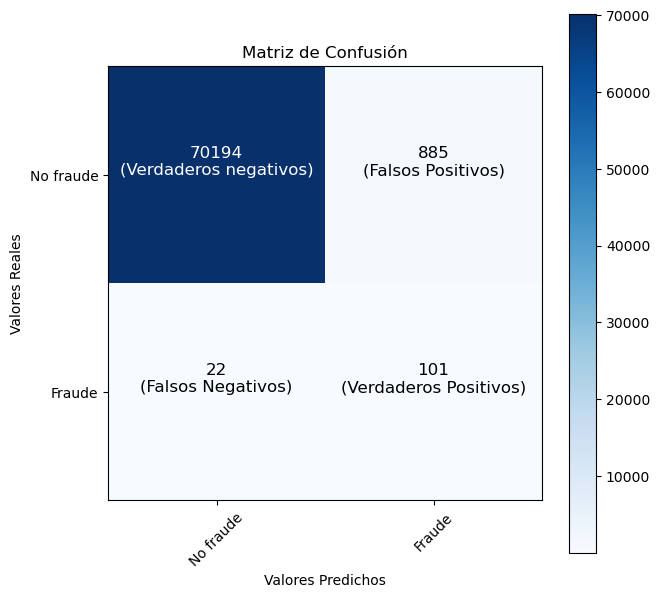

In [246]:
# Generamos el gráfico de la matriz de confusión usando la función plot_cm
# Parámetros:
# - conf_fraude: Matriz de confusión obtenida del modelo
# - ['No fraude', 'Fraude']: Etiquetas para las clases, indicando si hubo fraude o no
plot_cm(conf_fraude, ['No fraude', 'Fraude'])

### kernel **Polinomial**

In [248]:
# Definimos un nuevo modelo SVM llamado mod2
# Usamos un kernel polinómico ('poly') para capturar relaciones no lineales en los datos
mod2 = SVC(kernel='poly')

In [250]:
# Guardamos el registro del momento en el que empezamos el entrenamiento
hora_inicio = time()

# Iniciamos el entrenamiento ejecutando el metodo fit
# Los valores que enviamos son los valores de X y y
#
# El .ravel() que final de y.values es un pequeño truco para cambiar su forma
# esto permite convertir una matriz de dos dimensiones en una sola dimesión,
# con ello, cada elemento de esta nueva matriz corresponde a un registro de X
mod2.fit(dfsres_X.values, dfres_y.values.ravel())

# Imprimimos el tiempo tomado para el entrenamiento
print("Entrenamiento terminado en {} segundos".format(time() - hora_inicio))

Entrenamiento terminado en 0.016860246658325195 segundos


In [252]:
# Otra vez guardaremos registro del tiempo que nos toma crear esta predicción
hora_inicio = time()
# Iniciamos la predicción con nuestra X de prueba
y_pred = mod2.predict(x_test)
# Mostramos el tiempo tomado para la predicción
print("Predicción terminada en {} segundos".format(time() - hora_inicio))

D:\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


Predicción terminada en 1.1057605743408203 segundos


In [254]:
# Calculamos la precisión del modelo comparando valores reales vs predichos
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)
# Mostramos el resultado con formato más claro
print("Precisión del modelo: {:.2f}%".format(accuracy * 100))

0.34190050841268504
Precisión del modelo: 34.19%


#### Matriz de confusión (Polinomial)

In [256]:
# La función confusion_matrix recibe las "respuestas correctas" y nuestras predicciones
# genera una matriz que indica, para cada clase, la cantidad de predicciones correctas e incorrectas
conf_fraude = confusion_matrix(y_test, y_pred)
conf_fraude

array([[24252, 46827],
       [   31,    92]], dtype=int64)

In [258]:

def plot_cm(cm, classes):
    """Genera un gráfico con la matriz de confusión y etiquetas descriptivas.

    Parámetros:
    cm : array (Matriz de confusión)
    classes : list (Lista con las clases del modelo)
    """
    plt.figure(figsize=(7, 7))
    plt.imshow(cm, cmap=plt.cm.Blues)
    plt.title('Matriz de Confusión')
    plt.colorbar()
    
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    # Definir etiquetas para cada celda de la matriz de confusión
    etiquetas = np.array([["Verdaderos negativos", "Falsos Positivos"], ["Falsos Negativos", "Verdaderos Positivos"]])  # Verdaderos/Falsos positivos y negativos
    thresh = cm.max() / 2.0  # Umbral para cambiar el color del texto

    # Dibujar los valores dentro de la matriz con etiquetas
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, f"{cm[i, j]:d}\n({etiquetas[i, j]})",
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black",
                     fontsize=12)

    plt.ylabel("Valores Reales")
    plt.xlabel("Valores Predichos")
    plt.grid(False)  # Evitar líneas innecesarias
    plt.show()



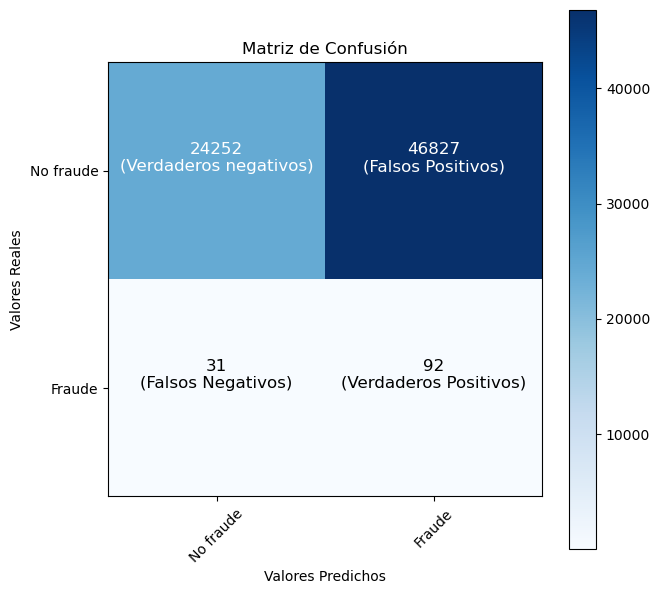

In [260]:
# Generamos el gráfico llamando la función que creamos y enviando los parámetros
# cm = nuestra matriz de confusión (conf_fraude)
# classes = las clases a predecir (si es fraude o no)
plot_cm(conf_fraude, ['No fraude', 'Fraude'])

### kernel **RBF**

In [262]:
# Definimos un nuevo modelo SVM llamado mod3
# Usamos un kernel polinómico ('RBF') para capturar relaciones no lineales en los datos
mod3 = SVC(kernel='rbf')

In [264]:
# Guardamos el registro del momento en el que empezamos el entrenamiento
hora_inicio = time()

# Iniciamos el entrenamiento ejecutando el metodo fit
# Los valores que enviamos son los valores de X y y
#
# El .ravel() que final de y.values es un pequeño truco para cambiar su forma
# esto permite convertir una matriz de dos dimensiones en una sola dimesión,
# con ello, cada elemento de esta nueva matriz corresponde a un registro de X
mod3.fit(dfsres_X.values, dfres_y.values.ravel())

# Imprimimos el tiempo tomado para el entrenamiento
print("Entrenamiento terminado en {} segundos".format(time() - hora_inicio))

Entrenamiento terminado en 0.01934337615966797 segundos


In [190]:
# Otra vez guardaremos registro del tiempo que nos toma crear esta predicción
hora_inicio = time()
# Iniciamos la predicción con nuestra X de prueba
y_pred = mod3.predict(x_test)
# Mostramos el tiempo tomado para la predicción
print("Predicción terminada en {} segundos".format(time() - hora_inicio))

D:\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


Predicción terminada en 2.9267935752868652 segundos


In [ ]:
# Calculamos la precisión del modelo comparando valores reales vs predichos
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)
# Mostramos el resultado con formato más claro
print("Precisión del modelo: {:.2f}%".format(accuracy * 100))

### Matriz de confusión (RBF)

In [192]:
# La función confusion_matrix recibe las "respuestas correctas" y nuestras predicciones
# genera una matriz que indica, para cada clase, la cantidad de predicciones correctas e incorrectas
conf_fraude = confusion_matrix(y_test, y_pred)
conf_fraude

array([[32070, 39009],
       [   35,    88]], dtype=int64)

In [194]:

def plot_cm(cm, classes):
    """Genera un gráfico con la matriz de confusión y etiquetas descriptivas.

    Parámetros:
    cm : array (Matriz de confusión)
    classes : list (Lista con las clases del modelo)
    """
    plt.figure(figsize=(7, 7))
    plt.imshow(cm, cmap=plt.cm.Blues)
    plt.title('Matriz de Confusión')
    plt.colorbar()
    
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    # Definir etiquetas para cada celda de la matriz de confusión
    etiquetas = np.array([["Verdaderos negativos", "Falsos Positivos"], ["Falsos Negativos", "Verdaderos Positivos"]])  # Verdaderos/Falsos positivos y negativos
    thresh = cm.max() / 2.0  # Umbral para cambiar el color del texto

    # Dibujar los valores dentro de la matriz con etiquetas
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, f"{cm[i, j]:d}\n({etiquetas[i, j]})",
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black",
                     fontsize=12)

    plt.ylabel("Valores Reales")
    plt.xlabel("Valores Predichos")
    plt.grid(False)  # Evitar líneas innecesarias
    plt.show()



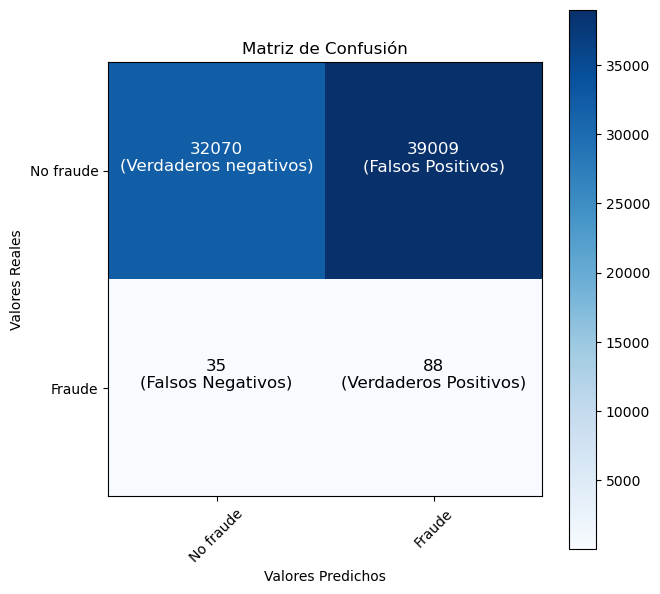

In [196]:
# Generamos el gráfico llamando la función que creamos y enviando los parámetros
# cm = nuestra matriz de confusión (conf_fraude)
# classes = las clases a predecir (si es fraude o no)
plot_cm(conf_fraude, ['No fraude', 'Fraude'])